# Taller 2 - Red de Monitoreo de Calidad del Aire de Bogota.
http://rmcab.ambientebogota.gov.co/Report/stationreport

## Descripción de los datos 

## 1. Cargar Librerias
***

In [132]:
# Carga las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline

## 2. Cargar Datos

In [161]:
#dataframe nombrado "df"
#Se usará el conjunto de datos "dataset_with_geo_missing" creado en el Taller 1, 
#este conjunto de datos, se caracteriza por no tener algunos valores.

 # carga el conjunto de datos ../Taller1/data/dataset_with_geo_missing.csv
df = pd.read_csv('work/dataScienceCourse/data/dataset_with_geo_missing.csv', sep=',', engine='python', encoding='latin1')
df.head()

,PM10,PM2.5,NO,NO2,NOX,CO,OZONO,Station,DateTime,Status,Latitud,Longitud,month,day_week,day_month,hour
0,52.6,37.0,53.384,3.428,56.817,NaN,NaN,7MA,2021-01-01 01:00:00,True,4.645117,-74.061503,1,4,1,1
1,77.9,61.0,49.105,3.420,52.525,NaN,NaN,7MA,2021-01-01 02:00:00,True,4.645117,-74.061503,1,4,1,2
2,58.5,48.0,47.284,4.062,51.346,NaN,NaN,7MA,2021-01-01 03:00:00,True,4.645117,-74.061503,1,4,1,3
3,57.2,44.0,46.059,3.606,49.664,NaN,NaN,7MA,2021-01-01 04:00:00,True,4.645117,-74.061503,1,4,1,4
4,53.5,39.0,39.851,1.625,41.475,NaN,NaN,7MA,2021-01-01 05:00:00,True,4.645117,-74.061503,1,4,1,5


## 3: Explorar datos
*** 

###  3.1 Estadisticas 
***
Resumen: 
- Identificar nombre de las columnas
- Número de columnas y filas 
- Tamaño del conjunto de datos
- Tipos de datos
- Porcentajes de valores
- Correlaciones de variables
- Valores nulos


In [134]:
# Estadisticas basicas del conjunto de datos 
df.columns

Index(['PM10', 'PM2.5', 'NO', 'NO2', 'NOX', 'CO', 'OZONO', 'Station',
       'DateTime', 'Status', 'Latitud', 'Longitud', 'month', 'day_week',
       'day_month', 'hour'],
      dtype='object')

In [135]:
#Descripción del conjunto de datos: 166440 observaciones y 10 caracteristicas
df.shape

(166440, 16)

In [136]:
# Comprobar el número de Filas y Columnas 
print("Número de  Filas: ", len(df))
print("Número de Columnas ", + len(df.columns))

#Comprobar el tipo de datos en las características
print(df.dtypes)

Número de  Filas:  166440
Número de Columnas  16
PM10         float64
PM2.5        float64
NO           float64
NO2          float64
NOX          float64
CO           float64
OZONO        float64
Station       object
DateTime      object
Status          bool
Latitud      float64
Longitud     float64
month          int64
day_week       int64
day_month      int64
hour           int64
dtype: object


In [137]:
#Comprobar si hay valores nulos true o false
print(df.isnull().any())

PM10          True
PM2.5         True
NO            True
NO2           True
NOX           True
CO            True
OZONO         True
Station      False
DateTime     False
Status       False
Latitud      False
Longitud     False
month        False
day_week     False
day_month    False
hour         False
dtype: bool


In [138]:
# Validar numero de valores nulos por caracteristica
print(df.isnull().sum())

PM10         20014
PM2.5        15312
NO           27664
NO2          27662
NOX          27668
CO           31238
OZONO        32132
Station          0
DateTime         0
Status           0
Latitud          0
Longitud         0
month            0
day_week         0
day_month        0
hour             0
dtype: int64


In [139]:
# Esta celda eliminará todas las filas que tienen valores nulos solo para la caracteristica PM2.5
df = df.dropna(subset=['PM2.5'])
print(df.isnull().any())

PM10          True
PM2.5        False
NO            True
NO2           True
NOX           True
CO            True
OZONO         True
Station      False
DateTime     False
Status       False
Latitud      False
Longitud     False
month        False
day_week     False
day_month    False
hour         False
dtype: bool


In [140]:
# Resumen de una variable (False V.S. True) en la variable Status
# Agrupar por la columna 'Status'
Status_Summary = df.groupby('Status')

# Calcular la media de las columnas numéricas
Status_Summary.mean(numeric_only=True)

,PM10,PM2.5,NO,NO2,NOX,CO,OZONO,Latitud,Longitud,month,day_week,day_month,hour
Status,,,,,,,,,,,,,
False,18.914355,6.078521,12.106935,11.669613,23.776336,0.463858,12.364907,4.656016,-74.097669,6.452010,3.033410,15.552873,12.555353
True,45.786601,24.622938,26.674421,19.175339,45.843120,0.925081,11.054208,4.647198,-74.113800,6.885615,2.986475,15.995248,12.431924


In [141]:
#Filtrar datos por columnas
df['Status'] = df['PM2.5'] > 12
df.Status.value_counts()

Status
False    75786
True     75342
Name: count, dtype: int64

####  3.1.1 Correlación
***

Resumen:


- Hay una correlación **positiva(+) a 1** o **negativa(-) a -1** hay una correlacion fuerte. La aproximación a 0 es mas debil la relacion lineal  

,PM10,PM2.5,NO,NO2,NOX,CO,OZONO,Status,Latitud,Longitud,month,day_week,day_month,hour
PM10,1.000000,0.802069,0.333551,0.429229,0.431702,0.540223,-0.037284,0.589838,-0.156404,-0.347981,0.067521,-0.051476,0.024679,0.001573
PM2.5,0.802069,1.000000,0.336237,0.476576,0.447956,0.574157,-0.060233,0.743737,-0.112961,-0.250248,0.057089,-0.027135,0.024499,-0.017080
NO,0.333551,0.336237,1.000000,0.177441,0.954018,0.641977,-0.392281,0.266924,0.000683,0.112076,0.065695,-0.041166,0.014469,-0.089875
NO2,0.429229,0.476576,0.177441,1.000000,0.463926,0.556881,-0.357302,0.406814,-0.051752,-0.282244,0.125257,-0.061379,0.039778,0.078510
NOX,0.431702,0.447956,0.954018,0.463926,1.000000,0.724278,-0.438799,0.364254,-0.015372,0.014813,0.097226,-0.055696,0.025396,-0.056927
CO,0.540223,0.574157,0.641977,0.556881,0.724278,1.000000,-0.296780,0.406113,-0.242054,-0.229861,0.031094,-0.033735,0.011437,0.067562
OZONO,-0.037284,-0.060233,-0.392281,-0.357302,-0.438799,-0.296780,1.000000,-0.064089,-0.005822,0.052697,-0.048731,0.037873,-0.002753,0.138389
Status,0.589838,0.743737,0.266924,0.406814,0.364254,0.406113,-0.064089,1.000000,-0.064167,-0.212641,0.062754,-0.011762,0.025053,-0.008882
Latitud,-0.156404,-0.112961,0.000683,-0.051752,-0.015372,-0.242054,-0.005822,-0.064167,1.000000,0.454655,0.026990,0.001172,0.005779,0.000495
Longitud,-0.347981,-0.250248,0.112076,-0.282244,0.014813,-0.229861,0.052697,-0.212641,0.454655,1.000000,0.011046,-0.001147,0.000459,0.000508


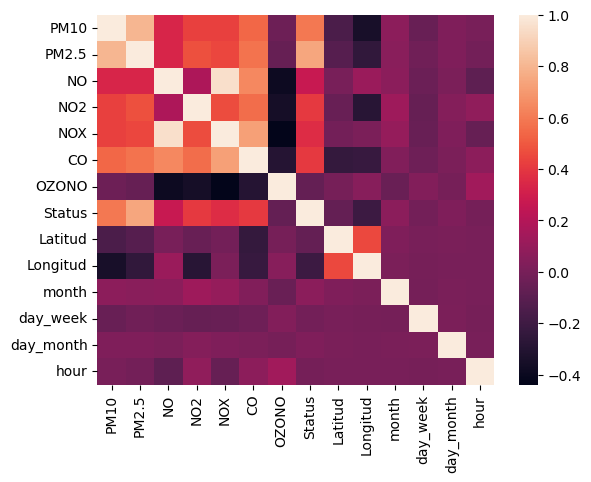

In [142]:
# Matriz de correlación
corr = df.corr(numeric_only=True)

# Visualización de la matriz de correlación
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corr

#### Coeficiente de Correlación: El coeficiente de correlación varía entre -1 y 1.
- 1 indica una correlación positiva perfecta.
- -1 indica una correlación negativa perfecta.
- 0 indica que no hay correlación.

##### Identificación de Relaciones:
Ayuda a identificar relaciones lineales entre variables. Por ejemplo, si dos variables tienen un coeficiente de correlación cercano a 1 o -1, significa que hay una fuerte relación lineal entre ellas.

##### Multicolinealidad:
En análisis de regresión, la matriz de correlación puede ayudar a detectar multicolinealidad, que ocurre cuando dos o más variables independientes están altamente correlacionadas.

##### Visualización:
La visualización de la matriz de correlación con un mapa de calor (heatmap) facilita la identificación rápida de relaciones fuertes o débiles entre variables.

###  3.2 Gráficos de distribución 


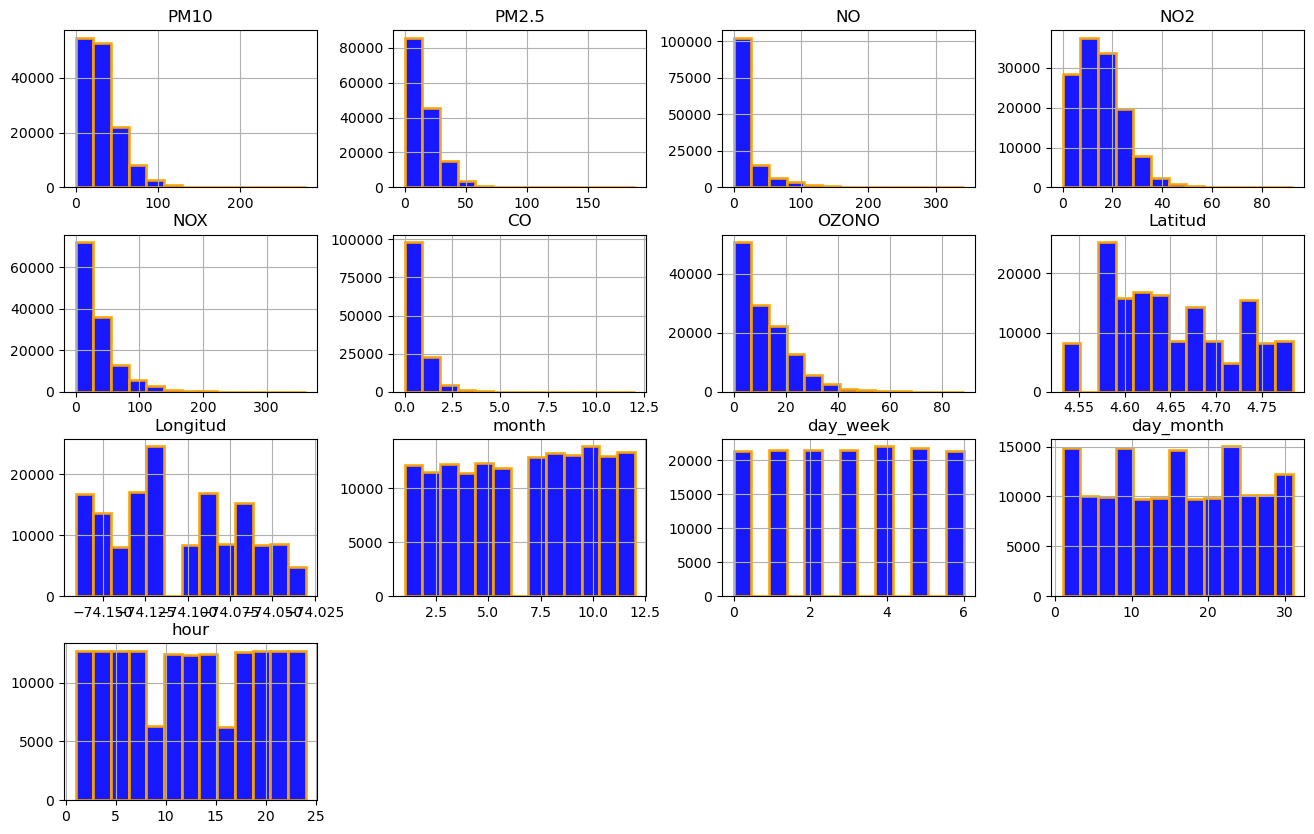

In [143]:
#hist es un grafico (pandas) de distribucion de  datos.
#este grafico nos sirve para identificar cuales son las variables numericas y su frencuencia. 

df.hist(figsize=(16,10),facecolor='blue', alpha=0.9, bins=13, edgecolor='orange', linewidth=2)
plt.show()

/tmp/ipykernel_816/1448057234.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.PM10, kde=False, color="g", ax=axes[0]).set_title('PM10')
/tmp/ipykernel_816/1448057234.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Status, kde=False, color="r", ax=axes[1]).set_title('Status')
/tmp/i

Text(0.5, 1.0, 'NOX')

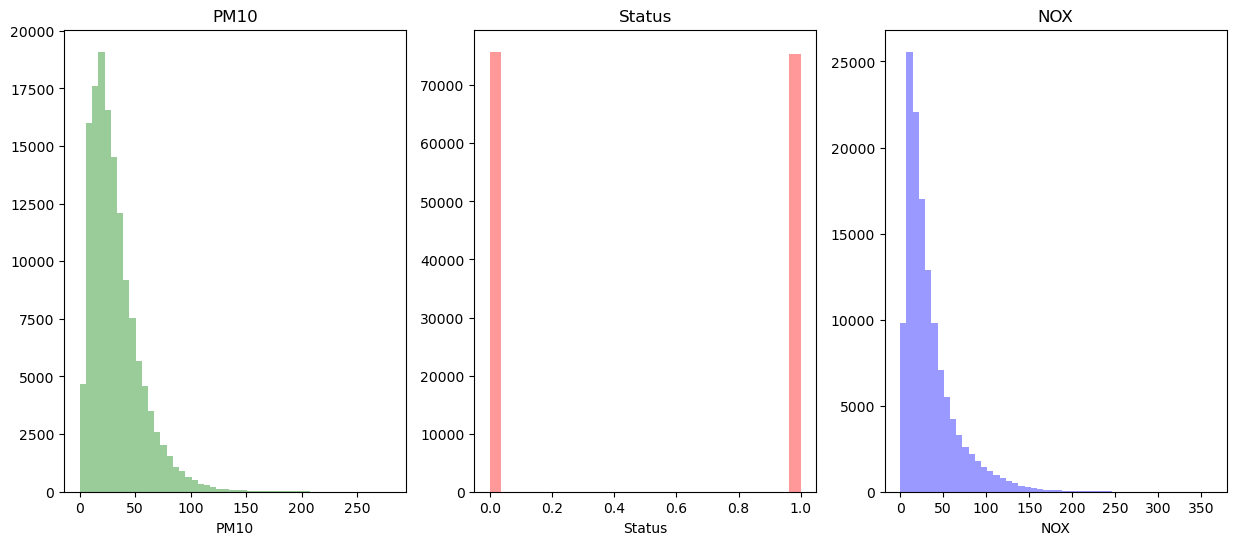

In [144]:
#otra forma de ver la distribucion de los datos
# Uso de Libreria Seaborn (sna) para poner multiples graficos de distribución  
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

#variable PM10
sns.distplot(df.PM10, kde=False, color="g", ax=axes[0]).set_title('PM10')

#variable PM10
sns.distplot(df.Status, kde=False, color="r", ax=axes[1]).set_title('Status')

#variable NOX
sns.distplot(df.NOX, kde=False, color="b", ax=axes[2]).set_title('NOX')

###  3.3 Gráfico de barras


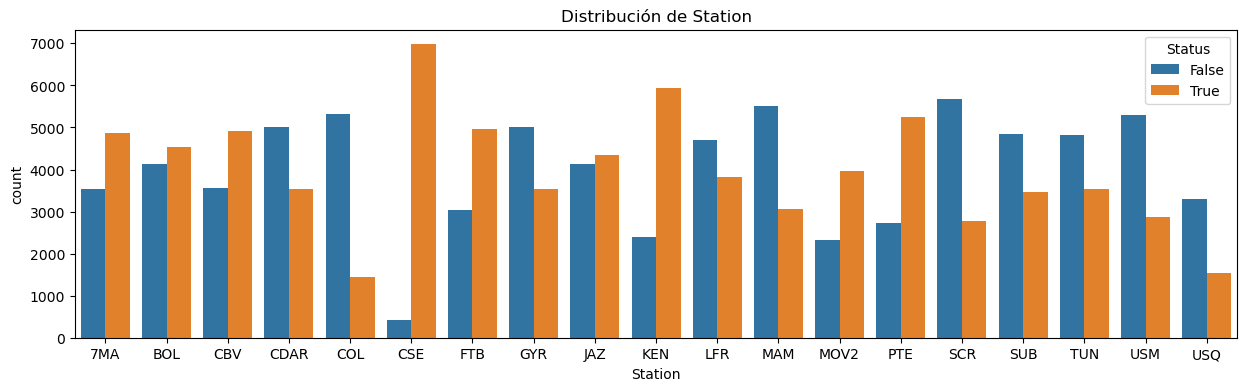

In [145]:
#ditribucion por estacion 
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(x="Station", hue='Status', data=df).set_title('Distribución de Station');

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 [Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000')])

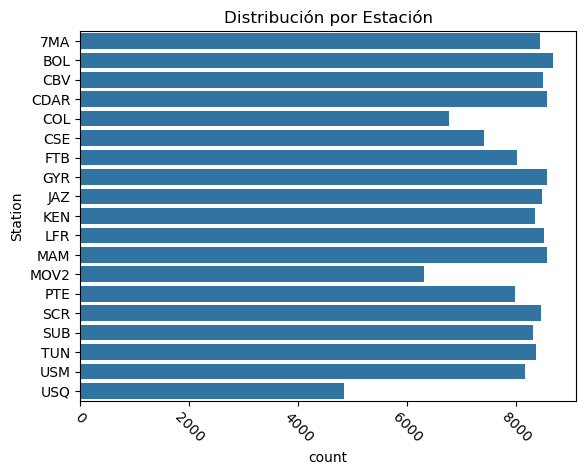

In [146]:
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8' ,'#FFFFF']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(y='Station', data=df).set_title('Distribución por Estación');
 
# Rotate x-labels
plt.xticks(rotation=-45)

###  3.4 Gráficos de Cajas


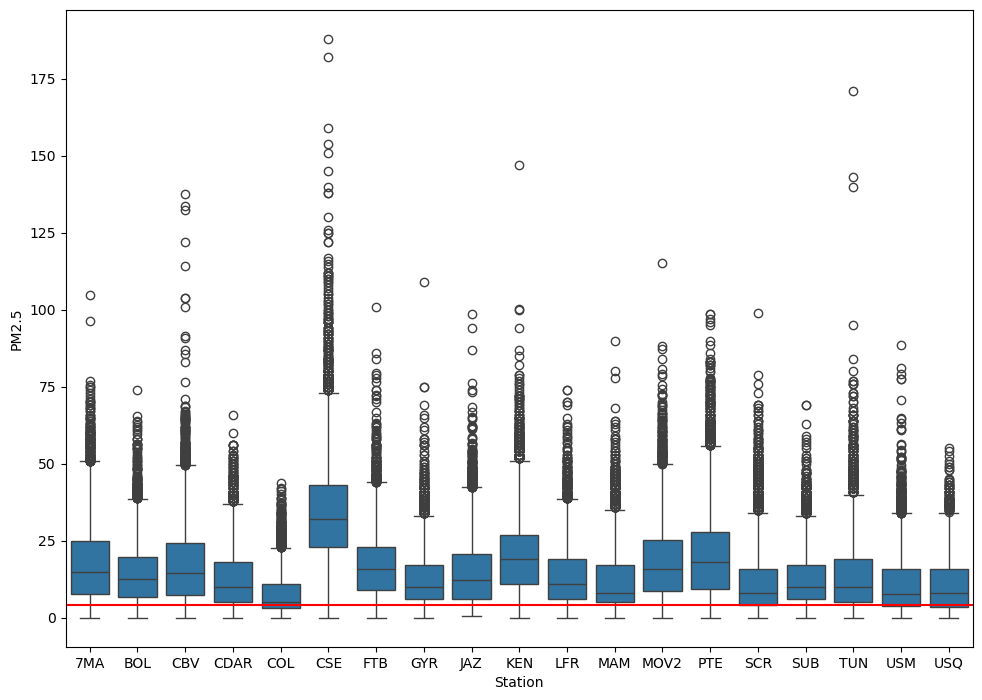

In [147]:
import seaborn as sns

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.boxplot(x="Station", y="PM2.5",  data=df)
valh=4
plt.axhline(valh, color='red')

Hemos revisado la información de ded dataset "calidad del aire", donde es importante la estación que mide la calidad del aire, sin embargo, no tenemos donde esta ubicada. 

Ahora vamos a cargar un nuevo dataset, que contiene la infromación de la ubicación (Latitud, Longitud) de cada estación.

## 4. Tecnicas para solucionar valores perdidos y anomalias en un dataset

In [148]:
#Contar valores nulos por columnas
df.isnull().sum()

PM10          9272
PM2.5            0
NO           20284
NO2          20281
NOX          20287
CO           24826
OZONO        25578
Station          0
DateTime         0
Status           0
Latitud          0
Longitud         0
month            0
day_week         0
day_month        0
hour             0
dtype: int64

In [149]:
nan_rows = df[df.isnull().any(axis=1)]
nan_rows

,PM10,PM2.5,NO,NO2,NOX,CO,OZONO,Station,DateTime,Status,Latitud,Longitud,month,day_week,day_month,hour
0,52.6,37.0,53.384,3.428,56.817,NaN,NaN,7MA,2021-01-01 01:00:00,True,4.645117,-74.061503,1,4,1,1
1,77.9,61.0,49.105,3.420,52.525,NaN,NaN,7MA,2021-01-01 02:00:00,True,4.645117,-74.061503,1,4,1,2
2,58.5,48.0,47.284,4.062,51.346,NaN,NaN,7MA,2021-01-01 03:00:00,True,4.645117,-74.061503,1,4,1,3
3,57.2,44.0,46.059,3.606,49.664,NaN,NaN,7MA,2021-01-01 04:00:00,True,4.645117,-74.061503,1,4,1,4
4,53.5,39.0,39.851,1.625,41.475,NaN,NaN,7MA,2021-01-01 05:00:00,True,4.645117,-74.061503,1,4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166067,NaN,6.0,NaN,NaN,NaN,0.25272,15.399,USQ,2021-12-16 12:00:00,False,4.710381,-74.030414,12,3,16,12
166277,NaN,8.0,6.349,7.900,14.249,0.34390,7.896,USQ,2021-12-25 06:00:00,False,4.710381,-74.030414,12,5,25,6
166322,NaN,16.0,1.176,5.196,6.372,0.23339,10.659,USQ,2021-12-27 03:00:00,True,4.710381,-74.030414,12,0,27,3
166367,NaN,17.0,6.271,8.220,14.491,0.36351,12.266,USQ,2021-12-28 00:00:00,True,4.710381,-74.030414,12,1,28,24


### 4.1 Completar con la media, mediana o desviación estándar

In [150]:
#Para todo el conjunto de datos 
df_1 = df.fillna(df.select_dtypes(include=[np.number]).std())
df_1.iloc[0]

#Para una sola columna

#df_1 = df['PM10'].fillna((df['PM10'].std()), inplace=True)

PM10                        52.6
PM2.5                       37.0
NO                        53.384
NO2                        3.428
NOX                       56.817
CO                      0.567832
OZONO                  10.225292
Station                      7MA
DateTime     2021-01-01 01:00:00
Status                      True
Latitud                 4.645117
Longitud              -74.061503
month                          1
day_week                       4
day_month                      1
hour                           1
Name: 0, dtype: object

In [151]:
df_1.isnull().sum()

PM10         0
PM2.5        0
NO           0
NO2          0
NOX          0
CO           0
OZONO        0
Station      0
DateTime     0
Status       0
Latitud      0
Longitud     0
month        0
day_week     0
day_month    0
hour         0
dtype: int64

### 4.2 Completar con valor predeterminada 

In [152]:
df_2 = df.fillna(25)
df_2.iloc[0]

PM10                        52.6
PM2.5                       37.0
NO                        53.384
NO2                        3.428
NOX                       56.817
CO                          25.0
OZONO                       25.0
Station                      7MA
DateTime     2021-01-01 01:00:00
Status                      True
Latitud                 4.645117
Longitud              -74.061503
month                          1
day_week                       4
day_month                      1
hour                           1
Name: 0, dtype: object

In [153]:
df_2.isnull().sum()

PM10         0
PM2.5        0
NO           0
NO2          0
NOX          0
CO           0
OZONO        0
Station      0
DateTime     0
Status       0
Latitud      0
Longitud     0
month        0
day_week     0
day_month    0
hour         0
dtype: int64

### 4.3 Eliminar NaN

In [154]:
nan_rows.head()

,PM10,PM2.5,NO,NO2,NOX,CO,OZONO,Station,DateTime,Status,Latitud,Longitud,month,day_week,day_month,hour
0,52.6,37.0,53.384,3.428,56.817,NaN,NaN,7MA,2021-01-01 01:00:00,True,4.645117,-74.061503,1,4,1,1
1,77.9,61.0,49.105,3.420,52.525,NaN,NaN,7MA,2021-01-01 02:00:00,True,4.645117,-74.061503,1,4,1,2
2,58.5,48.0,47.284,4.062,51.346,NaN,NaN,7MA,2021-01-01 03:00:00,True,4.645117,-74.061503,1,4,1,3
3,57.2,44.0,46.059,3.606,49.664,NaN,NaN,7MA,2021-01-01 04:00:00,True,4.645117,-74.061503,1,4,1,4
4,53.5,39.0,39.851,1.625,41.475,NaN,NaN,7MA,2021-01-01 05:00:00,True,4.645117,-74.061503,1,4,1,5


In [155]:
nan_rows.isnull().sum()

PM10          9272
PM2.5            0
NO           20284
NO2          20281
NOX          20287
CO           24826
OZONO        25578
Station          0
DateTime         0
Status           0
Latitud          0
Longitud         0
month            0
day_week         0
day_month        0
hour             0
dtype: int64

In [156]:
#Elinina todas las filas que tengan NaN
df_3 = nan_rows.dropna()
df_3.head()

,PM10,PM2.5,NO,NO2,NOX,CO,OZONO,Station,DateTime,Status,Latitud,Longitud,month,day_week,day_month,hour


In [157]:
df_3.isnull().sum()

PM10         0
PM2.5        0
NO           0
NO2          0
NOX          0
CO           0
OZONO        0
Station      0
DateTime     0
Status       0
Latitud      0
Longitud     0
month        0
day_week     0
day_month    0
hour         0
dtype: int64

In [159]:
df_2.head()

,PM10,PM2.5,NO,NO2,NOX,CO,OZONO,Station,DateTime,Status,Latitud,Longitud,month,day_week,day_month,hour
0,52.6,37.0,53.384,3.428,56.817,25.0,25.0,7MA,2021-01-01 01:00:00,True,4.645117,-74.061503,1,4,1,1
1,77.9,61.0,49.105,3.420,52.525,25.0,25.0,7MA,2021-01-01 02:00:00,True,4.645117,-74.061503,1,4,1,2
2,58.5,48.0,47.284,4.062,51.346,25.0,25.0,7MA,2021-01-01 03:00:00,True,4.645117,-74.061503,1,4,1,3
3,57.2,44.0,46.059,3.606,49.664,25.0,25.0,7MA,2021-01-01 04:00:00,True,4.645117,-74.061503,1,4,1,4
4,53.5,39.0,39.851,1.625,41.475,25.0,25.0,7MA,2021-01-01 05:00:00,True,4.645117,-74.061503,1,4,1,5


In [ ]:
# Exportar el conjunto de datos sin nulos a un archivo CSV
df_2.to_csv('work/dataScienceCourse/data/dataset_with_geo_missing_not_nulls.csv', index=False)